# 修改了原python502行，drop（columns=）用法已经淘汰，用【】，axis用法，data = data.drop(features_to_drop,axis=1)
# 重新运行需要停掉kernel再重新打开

In [1]:
# %load Feature selector project.py
from feature_selector import FeatureSelector
import pandas as pd
import numpy as np

# numpy and pandas for data manipulation
import numpy as np

# model used for feature importances
import lightgbm as lgb

# utility for early stopping with a validation set
from sklearn.model_selection import train_test_split

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# memory management
import gc

# utilities
from itertools import chain


In [2]:
#Example Dataset

train = pd.read_csv('C:/Users/Administrator/Scikit_learn/feature-selector-master/credit_example.csv')
train_labels = train['TARGET']

#pd.head，默认查看前五行数据。因为train已经是pd因此直接.head即可
print(train.head())    

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      247408       0         Cash loans           F            Y   
1      153916       0    Revolving loans           F            Y   
2      229065       0         Cash loans           F            N   
3      282013       0         Cash loans           F            N   
4      142266       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               N             2          108000.0    172512.0      13477.5   
1               Y             2          135000.0    180000.0       9000.0   
2               Y             0          112500.0    463500.0      20547.0   
3               Y             0          135000.0    549882.0      17739.0   
4               Y             0           90000.0    518562.0      20695.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0 

In [3]:
#pandas.drop的用法，删除Target列
train = train.drop(['TARGET'],axis=1)     

#对于pandas，行标为index，列表为columns
#如常用df = pd.DataFrame(np.random.randn(5,3),index = list('abcde'),columns = ['one','two','three'])


In [4]:
#Create the Instance
fs = FeatureSelector(data = train, labels = train_labels)

17 features with greater than 0.60 missing values.

['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE']


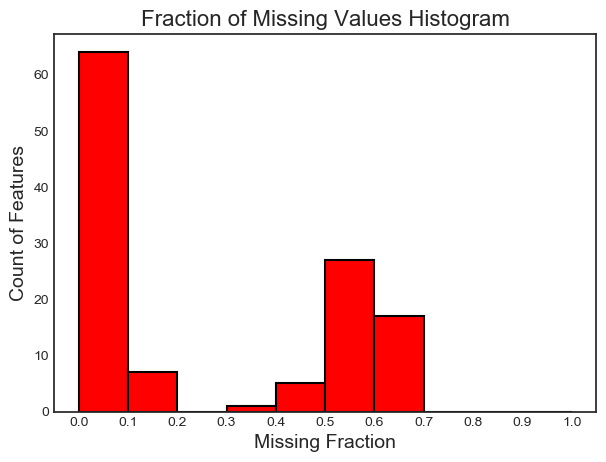

                          missing_fraction
COMMONAREA_AVG                      0.6953
COMMONAREA_MODE                     0.6953
COMMONAREA_MEDI                     0.6953
NONLIVINGAPARTMENTS_AVG             0.6945
NONLIVINGAPARTMENTS_MODE            0.6945
NONLIVINGAPARTMENTS_MEDI            0.6945
LIVINGAPARTMENTS_MEDI               0.6846
LIVINGAPARTMENTS_AVG                0.6846
LIVINGAPARTMENTS_MODE               0.6846
FONDKAPREMONT_MODE                  0.6820
FLOORSMIN_AVG                       0.6751
FLOORSMIN_MODE                      0.6751
FLOORSMIN_MEDI                      0.6751
YEARS_BUILD_AVG                     0.6635
YEARS_BUILD_MEDI                    0.6635
YEARS_BUILD_MODE                    0.6635
OWN_CAR_AGE                         0.6559
LANDAREA_MEDI                       0.5953
LANDAREA_AVG                        0.5953
LANDAREA_MODE                       0.5953


In [5]:
#   1   Missing Values

fs.identify_missing(missing_threshold=0.6)


#The features identified for removal can be accessed through the ops dictionary of the FeatureSelector object.
missing_features = fs.ops['missing']
print(missing_features[:20])

fs.plot_missing()         #在每一个画图的后面加上plt.show即可
plt.show()
print(fs.missing_stats.head(20))

4 features with a single unique value.

['FLAG_MOBIL', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_17']


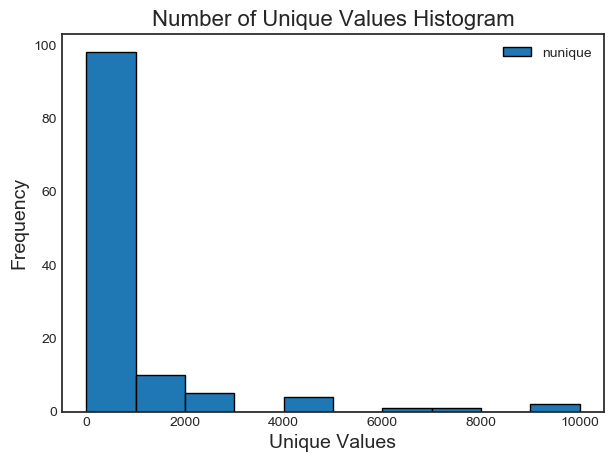

                            nunique
LANDAREA_MODE                  1469
REGION_RATING_CLIENT              3
FLAG_DOCUMENT_12                  1
AMT_REQ_CREDIT_BUREAU_WEEK        4
WEEKDAY_APPR_PROCESS_START        7


In [6]:
#   2   Single Unique Value



fs.identify_single_unique()

single_unique = fs.ops['single_unique']
print(single_unique)


fs.plot_unique()         #画图都不好用
plt.show()
print(fs.unique_stats.sample(5))

24 features with a correlation magnitude greater than 0.97.



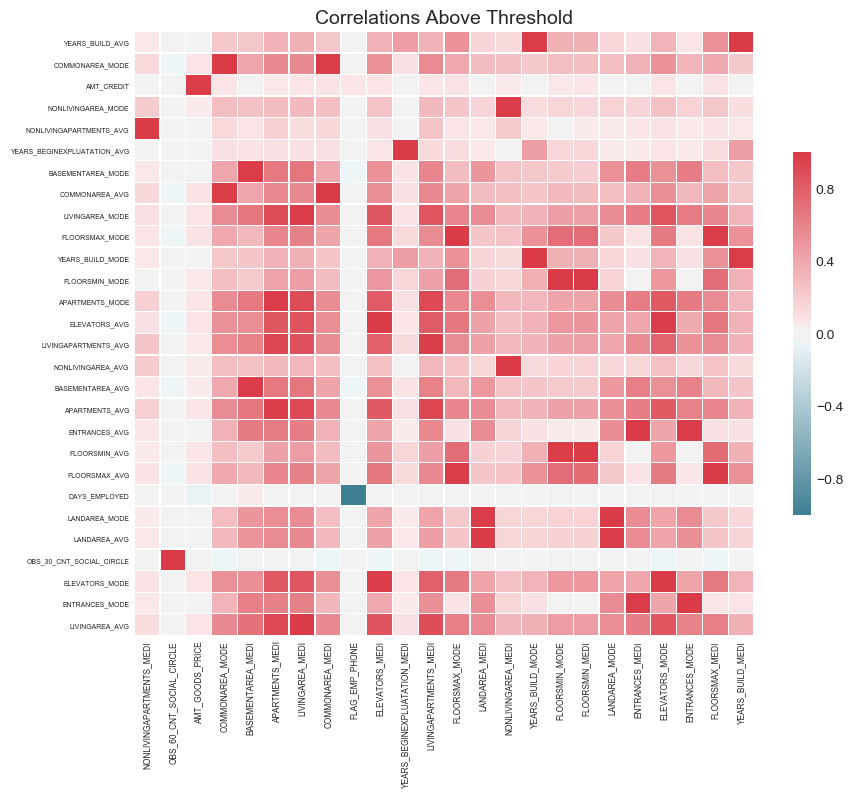

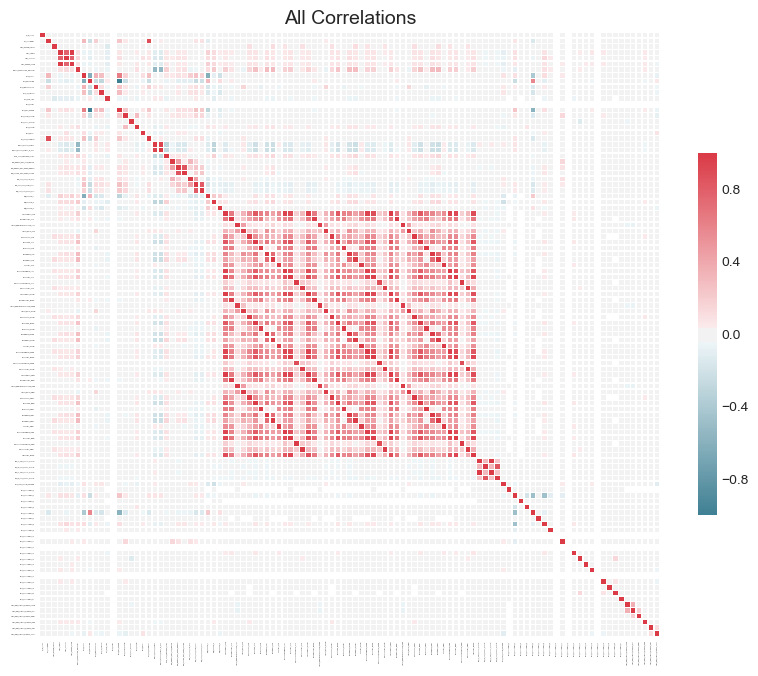

21 features with a correlation magnitude greater than 0.98.



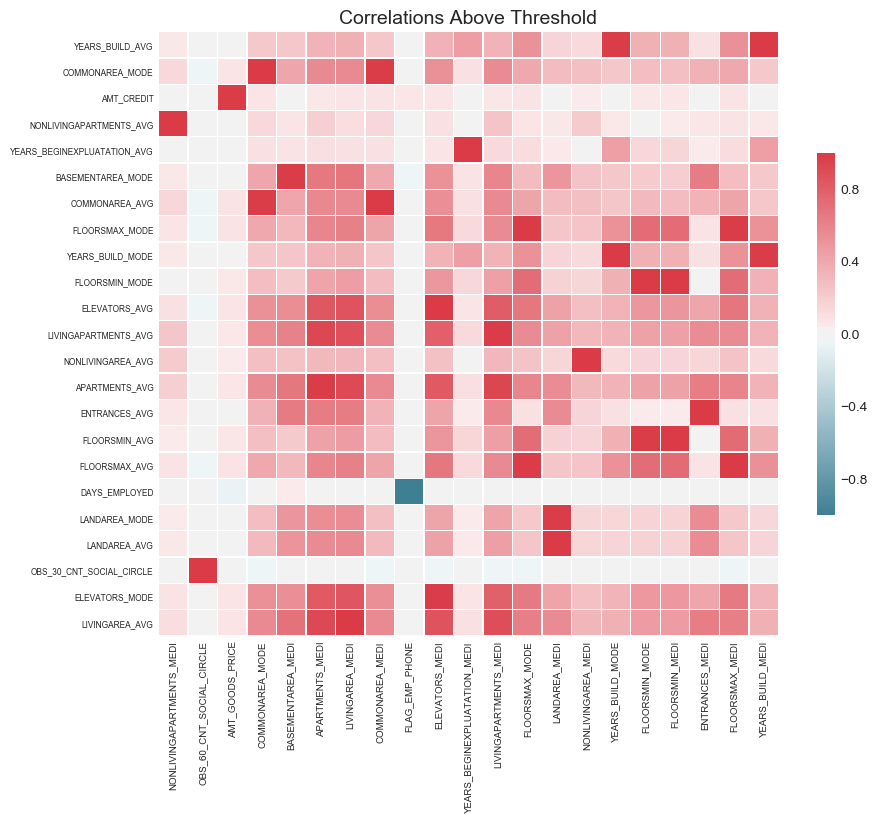

      corr_feature  corr_value      drop_feature
0       AMT_CREDIT    0.987232   AMT_GOODS_PRICE
1    DAYS_EMPLOYED   -0.999533    FLAG_EMP_PHONE
2  YEARS_BUILD_AVG    0.992120  YEARS_BUILD_MODE
3   COMMONAREA_AVG    0.988074   COMMONAREA_MODE
4    FLOORSMAX_AVG    0.984663    FLOORSMAX_MODE


In [7]:
#   3   Collinear (highly correlated) Feature

fs.identify_collinear(correlation_threshold=0.975)
correlated_features = fs.ops['collinear']
correlated_features[:5]

fs.plot_collinear()
plt.show()

fs.plot_collinear(plot_all=True)
plt.show()

fs.identify_collinear(correlation_threshold=0.98)
fs.plot_collinear()
plt.show()


print(fs.record_collinear.head())

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[70]	valid_0's auc: 0.746441	valid_0's binary_logloss: 0.230901
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.731398	valid_0's binary_logloss: 0.302044
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[26]	valid_0's auc: 0.742773	valid_0's binary_logloss: 0.234818
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[24]	valid_0's auc: 0.723268	valid_0's binary_logloss: 0.264159
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.726015	valid_0's binary_logloss: 0.271766
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[41]	valid_0's auc: 0.763156	valid_0's binary_logloss: 0.25

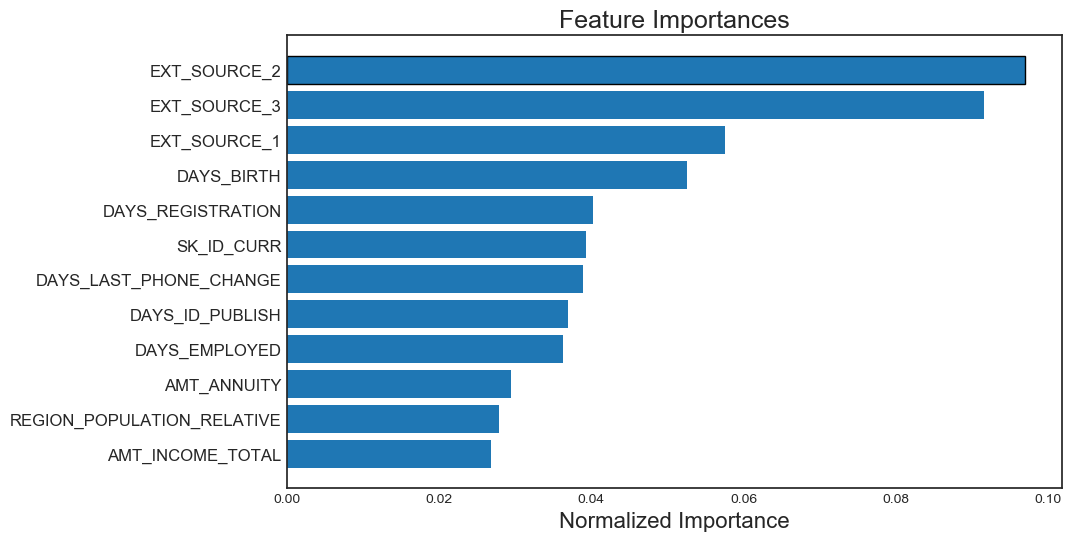

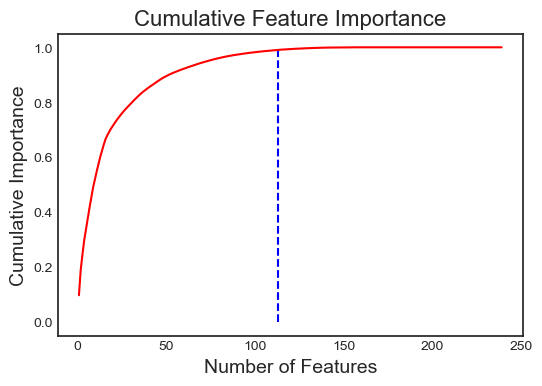

113 features required for 0.99 of cumulative importance
                  feature  importance  normalized_importance  \
0            EXT_SOURCE_2       109.9               0.096914   
1            EXT_SOURCE_3       103.9               0.091623   
2            EXT_SOURCE_1        65.3               0.057584   
3              DAYS_BIRTH        59.6               0.052557   
4       DAYS_REGISTRATION        45.6               0.040212   
5              SK_ID_CURR        44.6               0.039330   
6  DAYS_LAST_PHONE_CHANGE        44.2               0.038977   
7         DAYS_ID_PUBLISH        41.9               0.036949   
8           DAYS_EMPLOYED        41.1               0.036243   
9             AMT_ANNUITY        33.4               0.029453   

   cumulative_importance  
0               0.096914  
1               0.188536  
2               0.246120  
3               0.298677  
4               0.338889  
5               0.378219  
6               0.417196  
7               0.45414

100

In [8]:
#   4. Zero Importance Features：one-hot coding 主要用于0相关性特征的识别

fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)
one_hot_features = fs.one_hot_features    #one-hot哑变量
base_features = fs.base_features           #原有变量
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))
#There are 121 original features
#There are 134 one-hot features

print(fs.data_all.head(10))
#加一起就是255个变量


zero_importance_features = fs.ops['zero_importance']
print(zero_importance_features[1:15])

fs.plot_feature_importances(threshold = 0.99, plot_n = 12)
plt.show()

print(fs.feature_importances.head(10))


one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)

112 features required for cumulative importance of 0.99 after one hot encoding.
127 features do not contribute to cumulative importance of 0.99.

['NAME_HOUSING_TYPE_Rented apartment', 'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE_Electricity', 'NAME_FAMILY_STATUS_Widow', 'FLAG_OWN_REALTY_Y']


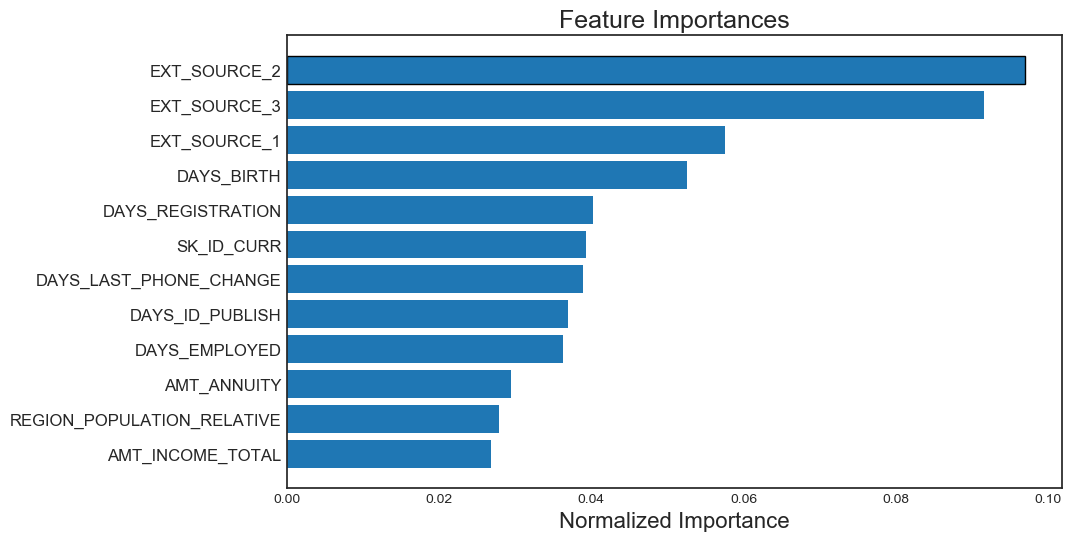

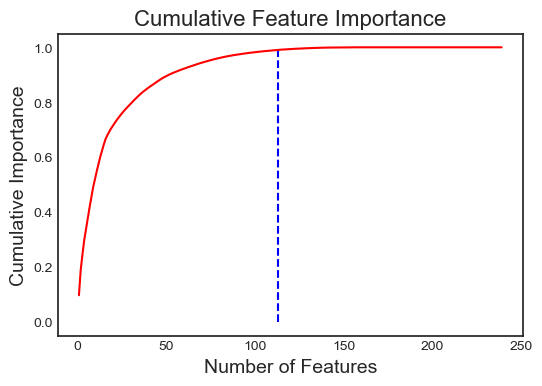

113 features required for 0.99 of cumulative importance


In [9]:
#    5. Low Importance Features


# When using this method, we must have already run identify_zero_importance and 
# need to pass in a cumulative_importance that accounts for that fraction of total feature importance.

fs.identify_low_importance(cumulative_importance = 0.99)

low_importance_features = fs.ops['low_importance']
print(low_importance_features[:5])

fs.plot_feature_importances(threshold = 0.99, plot_n = 12)
plt.show()

In [10]:
# 6   Removing Features

# Removing Features:    This method returns the resulting data which we can then use for machine learning. 
#                       The original data will still be accessible in the data attribute of the Feature Selector.

train_no_missing = fs.remove(methods = ['missing'])    #以鉴别17种
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])   #已经鉴别66+17=83种



all_to_remove = fs.check_removal()    #检查所有要删除的features
print(all_to_remove[0:])


train_removed = fs.remove(methods = 'all')   #删除所有的不好的features

Removed 17 features.
Removed 103 features.
Total of 153 features identified for removal
['ORGANIZATION_TYPE_Insurance', 'COMMONAREA_MEDI', 'FLAG_EMP_PHONE', 'WALLSMATERIAL_MODE_Others', 'ORGANIZATION_TYPE_Police', 'FLAG_MOBIL', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLAG_DOCUMENT_15', 'LIVINGAPARTMENTS_MEDI', 'FLAG_DOCUMENT_17', 'HOUSETYPE_MODE_terraced house', 'YEARS_BUILD_MODE', 'NAME_HOUSING_TYPE_With parents', 'FLAG_DOCUMENT_5', 'OCCUPATION_TYPE_Medicine staff', 'ORGANIZATION_TYPE_Trade: type 3', 'FLAG_DOCUMENT_11', 'OCCUPATION_TYPE_Sales staff', 'OWN_CAR_AGE', 'ORGANIZATION_TYPE_Trade: type 7', 'ORGANIZATION_TYPE_Transport: type 1', 'EMERGENCYSTATE_MODE_Yes', 'REG_REGION_NOT_WORK_REGION', 'FLOORSMIN_AVG', 'ORGANIZATION_TYPE_Trade: type 5', 'ORGANIZATION_TYPE_Military', 'ELEVATORS_MODE', 'ORGANIZATION_TYPE_Transport: type 2', 'ORGANIZATION_TYPE_Mobile', 'NAME_TYPE_SUITE_Other_B', 'ORGANIZATION_TYPE_University', 'NAME_INCOME_TYPE_Pensioner', 'YEARS_BUILD_MEDI', 'FONDKAPREMONT_MODE', 'ORGA

In [11]:
# 7   Handling One-Hot Features

train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 192 features including one-hot features.
Original Number of Features 121
Final Number of Features:  63


In [12]:
# 8 Alternative Option for Using all Methods ：一个命令全部做完
fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

fs.feature_importances.head()

#变量数可能不对应的原因，由于0相关和弱相关的数量在变化因此，可能会有偏差
#  There is a slight discrepancy between the number of features removed because the feature importances have changed.
#                         The number of features identified for removal by the missing, single_unique, and collinear will stay the same because they are deterministic, 
#                         but the number of features from zero_importance and low_importance may vary due to training a model multiple times.

17 features with greater than 0.60 missing values.

4 features with a single unique value.

21 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[93]	valid_0's auc: 0.757927	valid_0's binary_logloss: 0.249929
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[88]	valid_0's auc: 0.752861	valid_0's binary_logloss: 0.248886
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[49]	valid_0's auc: 0.739674	valid_0's binary_logloss: 0.277443
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[33]	valid_0's auc: 0.775404	valid_0's binary_logloss: 0.268205
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[54]	valid_0's auc: 0.722676	valid_0's binary_logloss: 0.254561
Tra

,feature,importance,normalized_importance,cumulative_importance
0,EXT_SOURCE_2,166.9,0.088447,0.088447
1,EXT_SOURCE_3,160.4,0.085003,0.173450
2,EXT_SOURCE_1,100.6,0.053312,0.226762
3,DAYS_BIRTH,82.7,0.043826,0.270588
4,DAYS_ID_PUBLISH,78.2,0.041441,0.312030
